# NetworkX 学习笔记

## 1. 基本操作

### 图的基本概念

- 图Graph: 若干节点和连接这些点的连线所构成的关系结构
- 顶点Node: 
- 边Edge: 两个顶点之间的连线, 称为边
- 有向图Digraph: 每条边都带有方向叫有向图
- 无向图Undirected graph: 每条边都没有方向
- 赋权图Weighted graph: 每条边都有一个或多个参数, 表示两点之间的距离, 时间, 费用等
- 度Degree: 与顶点相连的边的数量

### 图的创建

In [1]:
import networkx as nx

In [2]:
# Generate a graph

# Graph()类: 无向图
# DiGraph()类: 有向图
# MultiGraph()类: 多图
# MultiDiGraph()类: 有向多图
G = nx.Graph()

### 顶点的添加, 删除和查看

In [3]:
# 1. add node to Graph
G.add_node(1)
G.add_node(1, name='n1', weight=1.0)  # 新属性 name & weight
G.add_node(2, data='May-16')  # 新属性 time
G.add_nodes_from([3, 0, 6], dist=1)  # 添加多个顶点

# 2. remove node from Graph
G.remove_node(1)  # 删除单个顶点
G.remove_nodes_from(range(10, 15))  # 删除多个顶点

# 3. print
print(G.nodes())  #  查看所有节点
print(G._node)  # 查看所有节点以及各自属性

[2, 3, 0, 6]
{2: {'data': 'May-16'}, 3: {'dist': 1}, 0: {'dist': 1}, 6: {'dist': 1}}


### 边的添加, 删除和查看

In [4]:
# 1. add edge to G
G.add_edge(1, 5)
G.add_edge(1, 10, weight=2.7)

G.add_edges_from([(1,2,{'weight':0}), (2,3,{'color':'blue'})])
G.add_edges_from([(3,6),(1,2),(6,7),(5,10),(0,1)])
G.add_weighted_edges_from([(1,2,3.6),[6,12,0.5]])  # 向图中添加多条赋权边

# 2. remove edge from G
G.remove_edge(0, 1)

G.remove_edges_from([(2,3),(1,5),(6,7)])  # 从图中删除多条边

# 3. print
print(G.get_edge_data(1,2))  # 查看指定边 1-2 的属性

print(G.edges(data=True))  # 查看所有边的属性
print(G.edges)  # 查看所有边

{'weight': 3.6}
[(2, 1, {'weight': 3.6}), (3, 6, {}), (6, 12, {'weight': 0.5}), (1, 10, {'weight': 2.7}), (5, 10, {})]
[(2, 1), (3, 6), (6, 12), (1, 10), (5, 10)]


### 查看图的相关信息

In [5]:
# 是否存在某节点或某条边
print(G.has_node(5))
print(G.has_edge(1, 19))

# 所有顶点
print(G.nodes)

# 所有边
print(G.edges)

# 指定节点的度
print(G.degree(5))

# 所有节点的度
print(G.degree)

# 顶点数量
print(G.number_of_nodes())

# 边数量
print(G.number_of_edges())

# 指定顶点的邻接节点及属性
print(G.adj[2])

True
False
[2, 3, 0, 6, 1, 5, 10, 7, 12]
[(2, 1), (3, 6), (6, 12), (1, 10), (5, 10)]
1
[(2, 1), (3, 1), (0, 0), (6, 2), (1, 2), (5, 1), (10, 2), (7, 0), (12, 1)]
9
5
{1: {'weight': 3.6}}


In [6]:
# 其他函数

# 合并 G1, G2
# G_new = union(G1, G2)

# 各顶点的频率分布
print(nx.pagerank(G))

# 清空G
# G.clear()

{2: 0.12727045418013605, 3: 0.13383794055344753, 0: 0.020547945205479454, 6: 0.19992802067667795, 1: 0.21972281259488127, 5: 0.0542497901448447, 10: 0.1467021485595899, 7: 0.020547945205479454, 12: 0.07719294287946349}


### 图的绘制

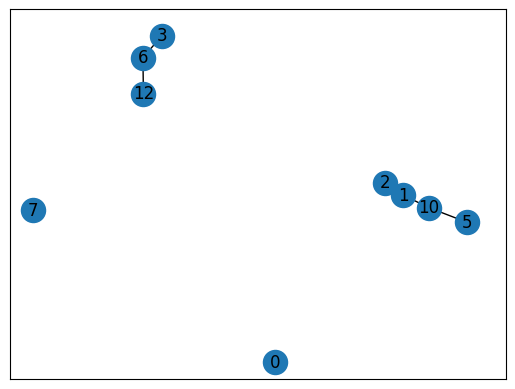

In [7]:
import matplotlib.pyplot as plt

nx.draw_networkx(G)

## 2. 图的最短路径

### Dijkstra最短路径算法

1. dijkstra_path(): 用于计算从源到目标的最短加权路径
2. dijkstra_path_length(): 用于计算从源到目标的最短加权路径长度

- dijkstra_path(G, source, target, weight='weight')
- dijkstra_path_length(G, source, target, weight='weight')

参数说明:
- G: Network Graph
- source: source node
- target: target node
- weight: 权

返回值:
- dijkstra_path(): 返回值是最短加权路径中的节点列表
- dijkstra_path_length(): 返回值是最短加权路径中的长度

顶点 v1 到 顶点 v11 的最短加权路径:  [1, 2, 5, 6, 3, 7, 10, 9, 11]
顶点 v1 到 顶点 v11 的最短加权路径长度:  13


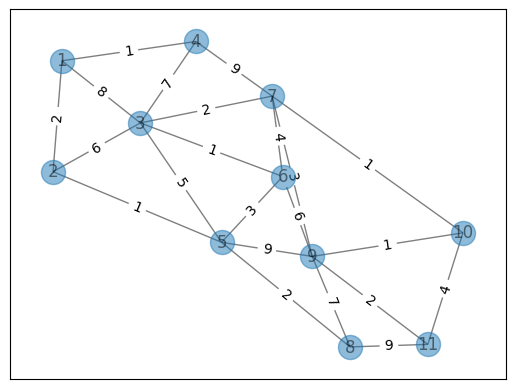

In [8]:
# Dijkstra Demo

import matplotlib.pyplot as plt # 导入 Matplotlib 工具包
import networkx as nx  # 导入 NetworkX 工具包

G2 = nx.Graph()
G2.add_weighted_edges_from([(1,2,2),(1,3,8),(1,4,1),
                            (2,3,6),(2,5,1),
                            (3,4,7),(3,5,5),(3,6,1),(3,7,2),
                            (4,7,9),
                            (5,6,3),(5,8,2),(5,9,9),
                            (6,7,4),(6,9,6),
                            (7,9,3),(7,10,1),
                            (8,9,7),(8,11,9),
                            (9,10,1),(9,11,2),
                            (10,11,4)])  # 向图中添加多条赋权边: (node1,node2,weight)

# 两个指定顶点之间的最短加权路径
minWPath_v1_v11 = nx.dijkstra_path(G2, source=1, target=11)
print("顶点 v1 到 顶点 v11 的最短加权路径: ", minWPath_v1_v11)

# 两个指定顶点之间的最短加权路径的长度
lMinWPath_v1_v11 = nx.dijkstra_path_length(G2, source=1, target=11)
print("顶点 v1 到 顶点 v11 的最短加权路径长度: ", lMinWPath_v1_v11)

pos = nx.spring_layout(G2)  # 用 FR算法排列节点
nx.draw_networkx(G2, pos, with_labels=True, alpha=0.5)
labels = nx.get_edge_attributes(G2,'weight')
nx.draw_networkx_edge_labels(G2, pos, edge_labels = labels)
plt.show()